In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = "../data/ignore/"
lap = pd.read_csv(data_path + "laptop_final.csv")

In [4]:
lap['name'] = lap['name'].str.lower()
name = lap["name"]

lap['brand'] = name.str.split().str[0]
lap['model'] = name.str.split().str[1]

In [5]:
lap = lap[lap['Cost'] < 10000]

In [6]:
fig = px.sunburst(lap, path=['brand', 'model'], title='Laptop Brands and Models')
fig.show()

In [7]:
top100 = lap['Cost'].nlargest(100)
top100 = lap.loc[top100.index]
fig = px.sunburst(top100, path=['brand', 'model'], title='Top 100 Most Expensive Laptops by brand and model')
fig.show()

In [8]:
bot100 = lap['Cost'].nsmallest(100)
bot100 = lap.loc[bot100.index]
fig = px.sunburst(bot100, path=['brand', 'model'], title='Top 100 Cheapest Laptops by brand and model')
fig.show()

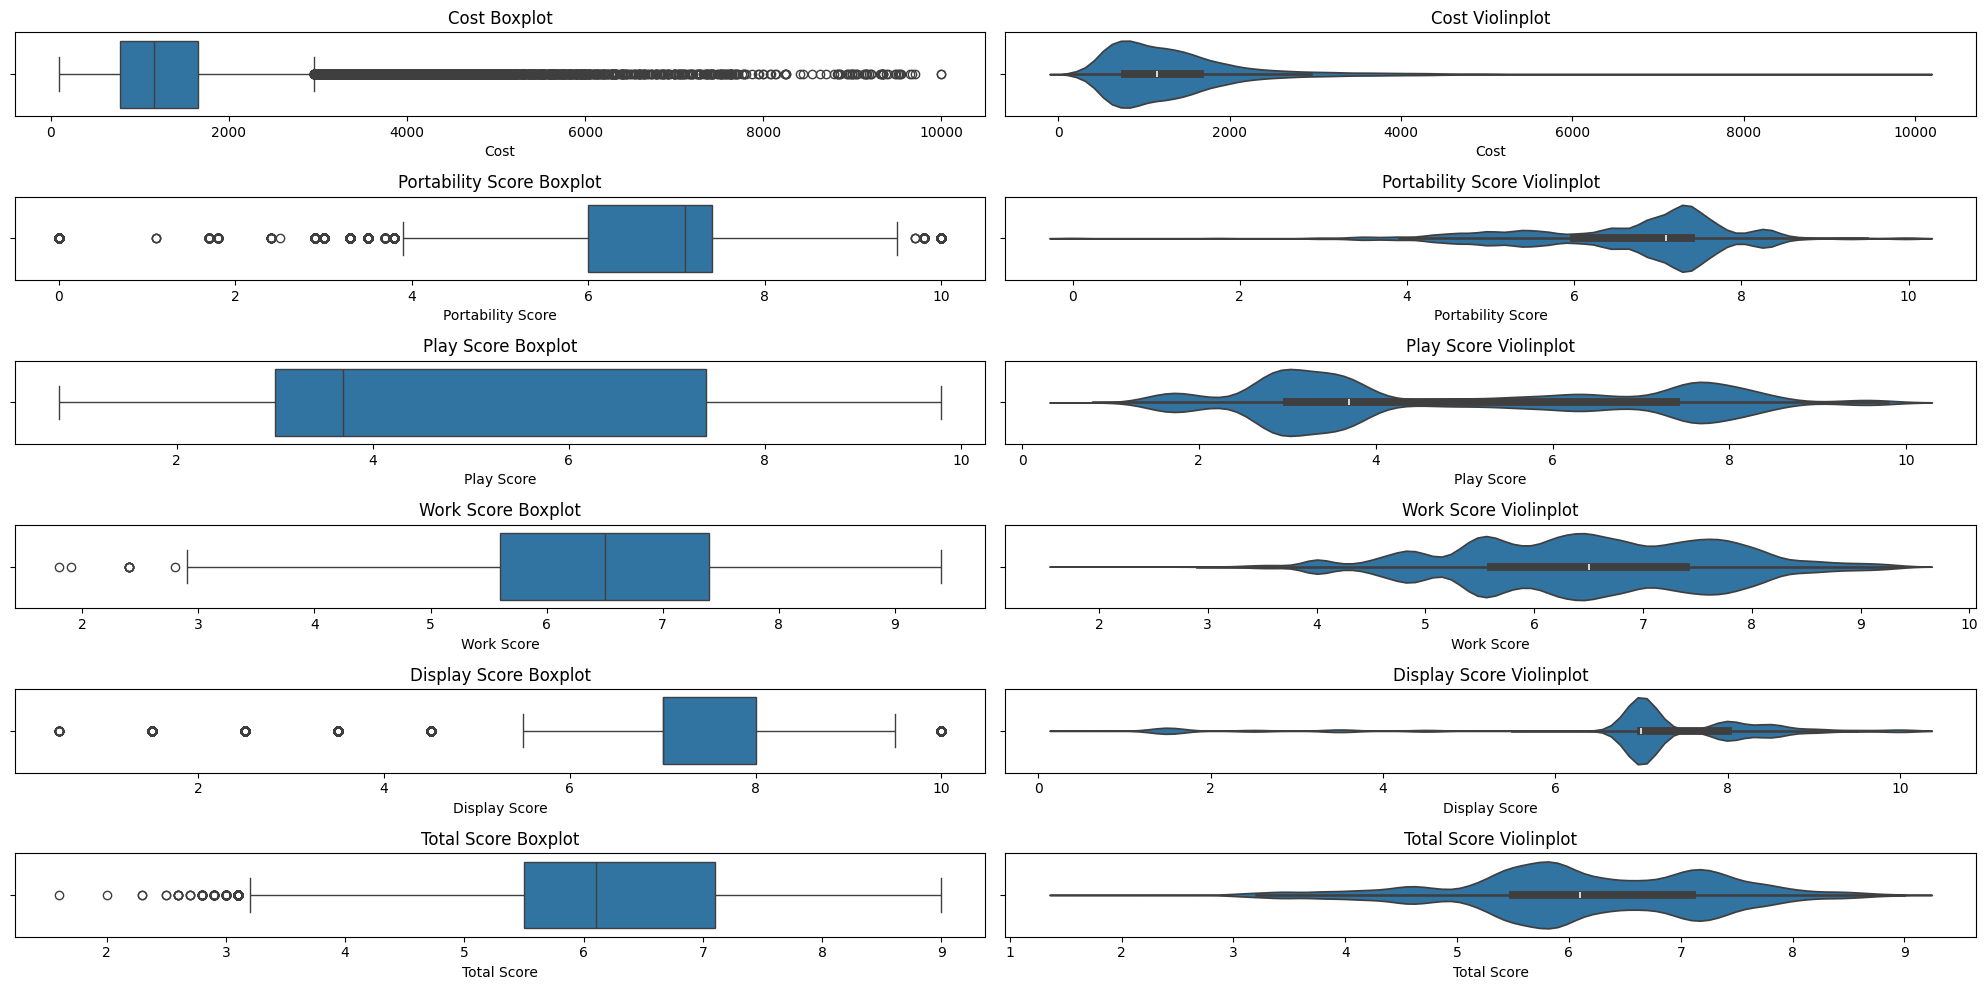

In [9]:
res = ['Cost', 'Portability Score', 'Play Score', 'Work Score', 'Display Score', 'Total Score']

fig, ax = plt.subplots(len(res), 2, figsize=(20, 10))
for col in res:
    sns.boxplot(x=col, data=lap, ax=ax[res.index(col), 0])
    sns.violinplot(x=col, data=lap, ax=ax[res.index(col), 1])
    ax[res.index(col), 0].set_title(f'{col} Boxplot')
    ax[res.index(col), 1].set_title(f'{col} Violinplot')

plt.tight_layout()

In [10]:
fig = px.scatter_matrix(lap, dimensions=res, title='Laptop Scores and Cost')
fig.update_traces(diagonal_visible=False)
fig.update_layout(width=1000, height=1000)
fig.show()

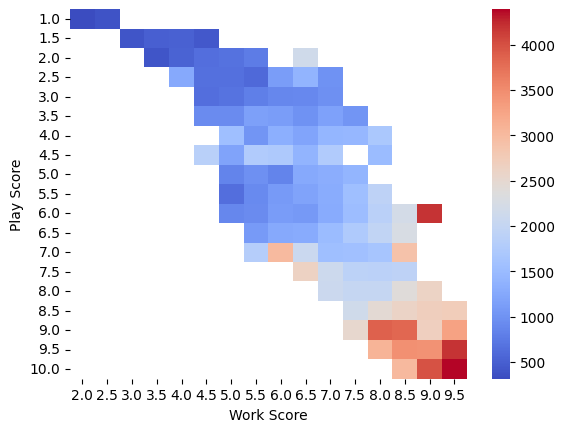

In [22]:
res = ['Cost', 'Play Score', 'Work Score']
res = pd.DataFrame(lap[res])
res['Play Score'] = res['Play Score'].apply(lambda x: (np.ceil(x * 2)) / 2)
res['Work Score'] = res['Work Score'].apply(lambda x: (np.ceil(x * 2)) / 2)
res = res.pivot_table(index='Play Score', columns='Work Score', values='Cost')
ax = sns.heatmap(res, cmap='coolwarm', annot=False)

In [23]:
os = lap['OS'].value_counts()
fig = px.pie(os, values=os, names=os.index, title='Laptop OS Distribution')
fig.show()

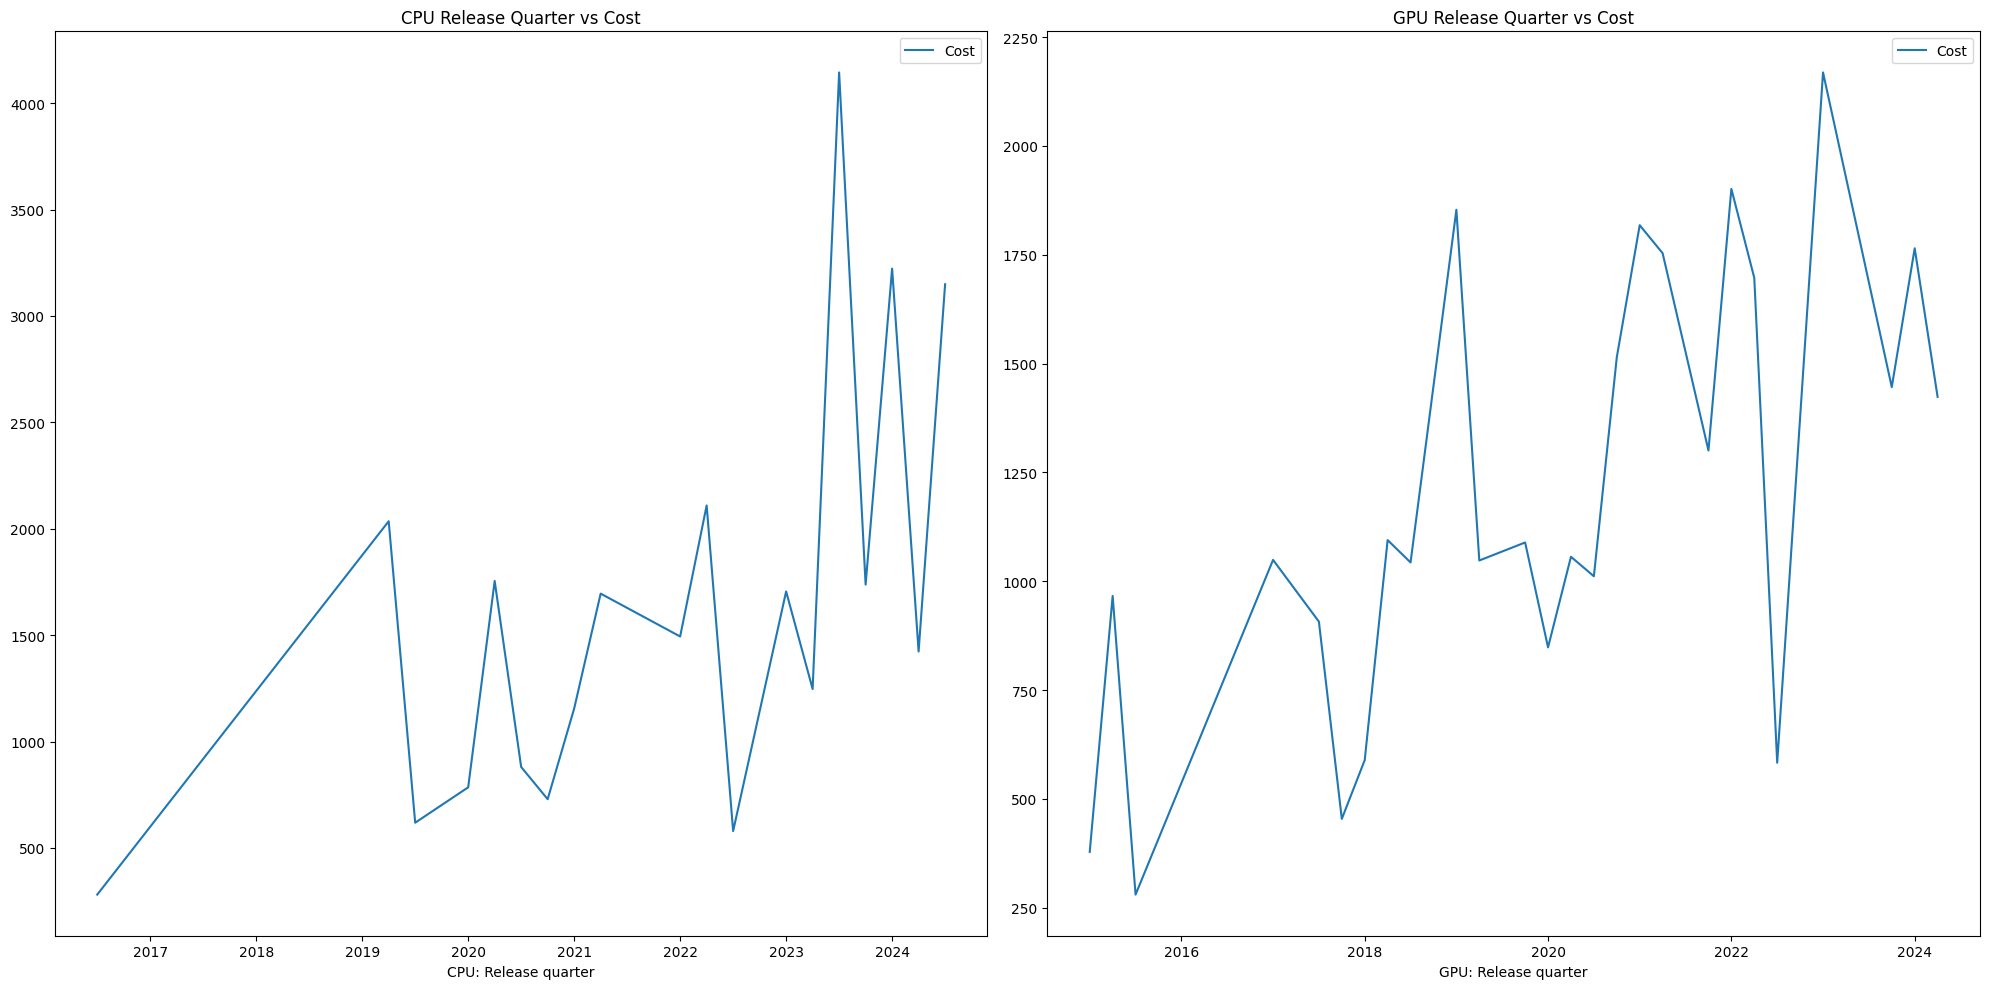

In [31]:
cpu_release = lap[['CPU: Release quarter', 'Cost']]
gpu_release = lap[['GPU: Release quarter', 'Cost']]
cpu_release = cpu_release.dropna()
gpu_release = gpu_release.dropna()
cpu_release = cpu_release.groupby('CPU: Release quarter').mean()
gpu_release = gpu_release.groupby('GPU: Release quarter').mean()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
cpu_release.plot(kind='line', ax=ax[0], title='CPU Release Quarter vs Cost')
gpu_release.plot(kind='line', ax=ax[1], title='GPU Release Quarter vs Cost')
plt.tight_layout()